In [32]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
cv2.__version__

'4.5.5'

## Mucking about with data types figuring out what to do

In [33]:
data = loadmat("/Users/emmanuelhilliard/Documents/Fall2022 Repositories/CIS4932/Final_Project/devkit/cars_meta.mat")
cars_train = loadmat("/Users/emmanuelhilliard/Documents/Fall2022 Repositories/CIS4932/Final_Project/devkit/cars_train_annos.mat")

z=cars_train['annotations']
y=z[0]

cars_test=loadmat("/Users/emmanuelhilliard/Documents/Fall2022 Repositories/CIS4932/Final_Project/devkit/cars_test_annos_withlabels.mat")
zz = cars_test['annotations']

yy=zz[0]


### creating y_train

In [34]:
y_train = list()
for i in range(len(y)):
    y_train.append(y[i]['class'][0][0])

print(len(y_train))

8144


Creating y_test

In [35]:
y_test = list()
for i in range(len(yy)):
    y_test.append(yy[i]['class'][0][0])

print(y_test)

[181, 103, 145, 187, 185, 78, 118, 165, 32, 60, 49, 108, 116, 135, 83, 51, 154, 33, 22, 32, 151, 4, 81, 107, 165, 191, 170, 195, 91, 5, 164, 148, 188, 44, 33, 7, 31, 74, 30, 166, 180, 106, 3, 65, 191, 35, 75, 85, 25, 168, 137, 134, 191, 156, 181, 120, 75, 130, 128, 36, 35, 118, 171, 37, 64, 183, 188, 83, 43, 18, 76, 137, 51, 130, 168, 1, 145, 60, 63, 174, 174, 17, 105, 50, 7, 195, 123, 82, 192, 93, 51, 146, 82, 96, 187, 55, 115, 113, 152, 92, 189, 21, 34, 87, 129, 143, 36, 130, 30, 20, 178, 12, 170, 33, 164, 154, 46, 61, 9, 31, 75, 120, 57, 174, 43, 29, 121, 6, 108, 6, 86, 69, 23, 36, 31, 109, 4, 90, 133, 126, 138, 159, 59, 124, 53, 154, 59, 28, 14, 71, 81, 26, 186, 159, 14, 172, 82, 10, 41, 115, 152, 179, 45, 98, 180, 10, 37, 71, 107, 88, 43, 160, 147, 25, 105, 52, 156, 88, 122, 123, 31, 41, 2, 134, 135, 22, 81, 161, 49, 33, 79, 18, 35, 110, 20, 104, 85, 28, 143, 160, 14, 126, 175, 159, 28, 126, 65, 182, 87, 24, 43, 112, 167, 9, 172, 130, 173, 88, 108, 67, 145, 193, 189, 50, 149, 79, 

Creating y_name

In [36]:
x = data['class_names']

y_name =dict()

for i in range(len(x[0])):
    y_name[i]=x[0][i][0]


print(y_name)

{0: 'AM General Hummer SUV 2000', 1: 'Acura RL Sedan 2012', 2: 'Acura TL Sedan 2012', 3: 'Acura TL Type-S 2008', 4: 'Acura TSX Sedan 2012', 5: 'Acura Integra Type R 2001', 6: 'Acura ZDX Hatchback 2012', 7: 'Aston Martin V8 Vantage Convertible 2012', 8: 'Aston Martin V8 Vantage Coupe 2012', 9: 'Aston Martin Virage Convertible 2012', 10: 'Aston Martin Virage Coupe 2012', 11: 'Audi RS 4 Convertible 2008', 12: 'Audi A5 Coupe 2012', 13: 'Audi TTS Coupe 2012', 14: 'Audi R8 Coupe 2012', 15: 'Audi V8 Sedan 1994', 16: 'Audi 100 Sedan 1994', 17: 'Audi 100 Wagon 1994', 18: 'Audi TT Hatchback 2011', 19: 'Audi S6 Sedan 2011', 20: 'Audi S5 Convertible 2012', 21: 'Audi S5 Coupe 2012', 22: 'Audi S4 Sedan 2012', 23: 'Audi S4 Sedan 2007', 24: 'Audi TT RS Coupe 2012', 25: 'BMW ActiveHybrid 5 Sedan 2012', 26: 'BMW 1 Series Convertible 2012', 27: 'BMW 1 Series Coupe 2012', 28: 'BMW 3 Series Sedan 2012', 29: 'BMW 3 Series Wagon 2012', 30: 'BMW 6 Series Convertible 2007', 31: 'BMW X5 SUV 2007', 32: 'BMW X6 S

iterate through file using cv2 to convert each image into image data then
combining the image data with a tuple and putting all of them into a lis

note: y_train is the results that should be gotten

In [37]:
x_train_lst = list()
y_train_1=list()

suffix=".jpg"
prefix1="/Users/emmanuelhilliard/Documents/Fall2022 Repositories/CIS4932/Final_Project/cars_train/0000"
prefix2="/Users/emmanuelhilliard/Documents/Fall2022 Repositories/CIS4932/Final_Project/cars_train/000"
prefix3="/Users/emmanuelhilliard/Documents/Fall2022 Repositories/CIS4932/Final_Project/cars_train/00"
prefix4="/Users/emmanuelhilliard/Documents/Fall2022 Repositories/CIS4932/Final_Project/cars_train/0"

image_smol_sizes = set()
for i in range(1,len(y_train)+1):
    if i<10:
        # if (((cv2.imread(prefix1+str(i)+suffix)).shape)[0] < 100) or (((cv2.imread(prefix1+str(i)+suffix)).shape)[1] < 150):

            # image_smol_sizes.add(i)
            # continue
        x_train_lst.append(cv2.imread(prefix1+str(i)+suffix))
        # y_train_1.append(y_train[i])
    elif i>=10 and i<100:
        # print(len(x_train_lst))
        # if (((cv2.imread(prefix2+str(i)+suffix)).shape)[0] < 100) or (((cv2.imread(prefix2+str(i)+suffix)).shape)[1] < 150):
        #     image_smol_sizes.add(i)
        #     continue
        x_train_lst.append(cv2.imread(prefix2+str(i)+suffix))
        # y_train_1.append(y_train[i])

    elif i>=100 and i<1000:
        # if (((cv2.imread(prefix3+str(i)+suffix)).shape)[0] < 100) or (((cv2.imread(prefix3+str(i)+suffix)).shape)[1] < 150):
        #     image_smol_sizes.add(i)

        #     continue
        x_train_lst.append(cv2.imread(prefix3+str(i)+suffix))
        # y_train_1.append(y_train[i])

    else:
        # if (((cv2.imread(prefix4+str(i)+suffix)).shape)[0] < 100) or (((cv2.imread(prefix4+str(i)+suffix)).shape)[1] < 150):
        #     image_smol_sizes.add(i)

        #     continue
        x_train_lst.append(cv2.imread(prefix4+str(i)+suffix))
        # y_train_1.append(y_train[i])
    # print(i)
# print(image_smol_sizes)
# print(len(image_smol_sizes)+len(x_train_lst))
# sum1 = 0
# for i in range(len(image_sizes)):
#     if (image_sizes[i][0])<100:
#         sum1+=1
#     if (image_sizes[i][1])<150:
#         sum1+=1

# print(sum1)

In [38]:
x_test_lst = list()

prefix1_test="/Users/emmanuelhilliard/Documents/Fall2022 Repositories/CIS4932/Final_Project/cars_test/0000"
prefix2_test="/Users/emmanuelhilliard/Documents/Fall2022 Repositories/CIS4932/Final_Project/cars_test/000"
prefix3_test="/Users/emmanuelhilliard/Documents/Fall2022 Repositories/CIS4932/Final_Project/cars_test/00"
prefix4_test="/Users/emmanuelhilliard/Documents/Fall2022 Repositories/CIS4932/Final_Project/cars_test/0"

image_smol_sizes_test = set()
for i in range(1,len(y_test)+1):
    if i<10:
        # if (((cv2.imread(prefix1_test+str(i)+suffix)).shape)[0] < 100) or (((cv2.imread(prefix1_test+str(i)+suffix)).shape)[1] < 150):
        #     image_smol_sizes_test.add(i)
        #     continue
        x_test_lst.append(cv2.imread(prefix1_test+str(i)+suffix))
        # print(len(x_test_lst))
    elif i>=10 and i<100:
        # if (((cv2.imread(prefix2_test+str(i)+suffix)).shape)[0] < 100) or (((cv2.imread(prefix2_test+str(i)+suffix)).shape)[1] < 150):
        #     image_smol_sizes_test.add(i)
        #     continue
        x_test_lst.append(cv2.imread(prefix2_test+str(i)+suffix))

    elif i>=100 and i<1000:
        # if (((cv2.imread(prefix3_test+str(i)+suffix)).shape)[0] < 100) or (((cv2.imread(prefix3_test+str(i)+suffix)).shape)[1] < 150):
        #     image_smol_sizes_test.add(i)

        #     continue
        x_test_lst.append(cv2.imread(prefix3_test+str(i)+suffix))

    else:
        # if (((cv2.imread(prefix4_test+str(i)+suffix)).shape)[0] < 100) or (((cv2.imread(prefix4_test+str(i)+suffix)).shape)[1] < 150):
        #     image_smol_sizes_test.add(i)

        #     continue
        x_test_lst.append(cv2.imread(prefix4_test+str(i)+suffix))
    print(i)
# print(image_smol_sizes_test)

1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
27

In [39]:
#Resize the images to all be 400x600x3
x_train_lst_resized = list()
# for i in range(1,len(y_train)-len(image_smol_sizes)):
    # if i not in image_smol_sizes:
print(len(x_train_lst))
print(len(y_train))
for i in range(0,len(y_train)):
    x_train_lst_resized.append(cv2.resize((x_train_lst[i]),(150,100),interpolation=cv2.INTER_AREA))
    print(i)

8144
8144
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274


In [40]:
x_test_lst_resized = list()
# for i in range(1,len(y_test)-len(image_smol_sizes_test)):
#     if i not in image_smol_sizes_test:
for i in range(0,len(y_test)):
    x_test_lst_resized.append(cv2.resize((x_test_lst[i]),(150,100),interpolation=cv2.INTER_AREA))
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [41]:
#Convert x_train and x_test into numpy arrays for future reshaping
x_train = np.array(x_train_lst_resized,dtype=object)
x_test = np.array(x_test_lst_resized,dtype=object)

# print x_train and x_test to see if it worked
print(x_train)
print(x_test)

[[[[112 108 90]
   [104 100 82]
   [107 103 85]
   ...
   [255 255 251]
   [254 254 248]
   [255 255 250]]

  [[103 99 81]
   [104 100 82]
   [111 107 89]
   ...
   [252 252 247]
   [249 249 243]
   [253 253 247]]

  [[104 100 82]
   [110 106 88]
   [117 113 95]
   ...
   [247 248 239]
   [247 247 241]
   [254 254 249]]

  ...

  [[161 175 173]
   [162 171 170]
   [166 174 176]
   ...
   [171 174 173]
   [175 175 174]
   [171 171 170]]

  [[160 175 173]
   [161 170 169]
   [161 169 171]
   ...
   [98 98 90]
   [100 97 90]
   [102 99 91]]

  [[155 170 167]
   [160 169 168]
   [161 169 171]
   ...
   [83 78 66]
   [78 79 66]
   [76 77 64]]]


 [[[182 177 172]
   [188 183 179]
   [193 187 184]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[187 182 178]
   [192 185 182]
   [193 188 185]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[190 186 181]
   [192 187 183]
   [194 189 185]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[131 138

In [42]:
n_train_samples= len(x_train)
n_test_samples = len(x_test)
dimension_image = x_train[0].shape
print("The dimension of each image is {0:d}x{1:d}, the training dataset has {2:d} sample and testing dataset has {3:d} samples ".format(dimension_image[0], dimension_image[1],n_train_samples,n_test_samples))

The dimension of each image is 100x150, the training dataset has 8144 sample and testing dataset has 8041 samples 


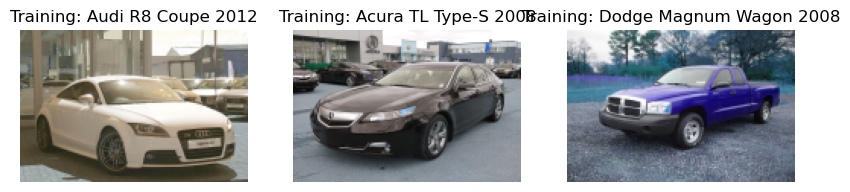

In [43]:
_, fig = plt.subplots(nrows=1, ncols=3, figsize=(10,10))
for ax, image, label in zip(fig,x_train_lst_resized, y_train):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title('Training: %s' % y_name[label])

In [44]:
# To use a CNN model the input's format must be (width x height x channels)
x_train_reshape = x_train.reshape(-1,100,150,3)
x_test_reshape = x_test.reshape(-1,100,150,3)

print("New data shape: (samples, width, height, channel=", x_train_reshape.shape)

New data shape: (samples, width, height, channel= (8144, 100, 150, 3)


In [45]:
# changing format from int8 to float32 (best numerical precision) and normalizing the data 

x_train_reshape = x_train_reshape.astype('float32')
x_test_reshape = x_test_reshape.astype('float32')
train_x = x_train_reshape / 255
test_x = x_test_reshape/255

In [46]:
#clean up y_train and y_test
# y_train_1 = list()
# for i in range(len(y_train)):
#     if i in image_smol_sizes:
#         continue
#     y_train_1.append(y_train[i])

print(len(y_train))

print(len(y_train_1))

8144
0


In [47]:
# transform your labels values into a categorical format or best known as one_hot encoding 
print(len(x_train_reshape))
print(len(y_train))
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

#Use the train_set_split function to create validation training set from train dataset
x_train_data, x_validation_data, y_train_data, y_validation_data = train_test_split(x_train_reshape, y_train_one_hot, test_size=.20, shuffle=False)

8144
8144


In [ ]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU

In [ ]:
# Defining hyperparameters
batch_size = 32
epochs= 15
num_classes = 10

In [ ]:
# Buidling your CNN model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(100,150,3),padding='same'))
cnn_model.add(LeakyReLU(alpha=0.1))
cnn_model.add(MaxPooling2D((2, 2),padding='same'))
cnn_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
cnn_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))